In [39]:
# import python packages
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import date
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.compat import lzip
import scipy.stats as stats
import seaborn as sns
import datetime
import statsmodels.tsa.stattools
!pip install arch
from arch import arch_model

In [40]:
import rpy2
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1)

!sudo apt-get update
!sudo apt-get install libgmp3-dev
!sudo apt-get install libmpfr-dev

# R package names
packnames = ('rugarch', 'rmgarch', 'mgarchBEKK')  # Needs to be a list

# Set up
from rpy2.robjects.vectors import StrVector
#utils = importr('utils')
#utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# Selectively install what needs to be install.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
print('Not Installed: ',names_to_install)

if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

# installation may take a couple of minutes

'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


Not Installed:  []


In [41]:
# import R packages
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.conversion import localconverter

base = importr('base')
methods = importr('methods')
rugarch = importr('rugarch')
rmgarch = importr('rmgarch')
mgarchBEKK = importr('mgarchBEKK')

In [42]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [43]:
##DATA GOLD

In [57]:
# Load the CSV file explicitly specifying the delimiter
#file_path_gold = r"C:\Users\nickr\Downloads\Master scriptie\Goldspot1.csv"
#file_path_gold = r"C:\Users\nickr\Downloads\DailySpotGold1.csv"
file_path_gold = r"C:\Users\nickr\Downloads\GoldSpot06-11.csv"
gold_data = pd.read_csv(file_path_gold, delimiter=';')



# Ensure the 'Date' column is correctly recognized as a datetime type
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

# Reverse the DataFrame to get the dates in the desired order
gold_data = gold_data[::-1]




# Clean and convert all relevant numeric columns ('Price', 'Open', 'High', 'Low') to float
columns_to_convert = ['Price', 'Open', 'High', 'Low']

for col in columns_to_convert:
    gold_data[col] = gold_data[col].str.replace(' ', '').str.replace(',', '').astype(float)


# Display the first few rows to check if the columns are now correctly separated
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
1302,2006-01-03,533.60,517.15,533.60,533.60,NaN,3.09%
1301,2006-01-04,534.55,534.60,534.55,534.55,NaN,0.18%
1300,2006-01-05,525.05,534.60,525.05,525.05,NaN,-1.78%
1299,2006-01-06,539.65,525.35,539.65,539.65,NaN,2.78%
1298,2006-01-09,549.12,539.38,549.12,549.12,NaN,1.75%


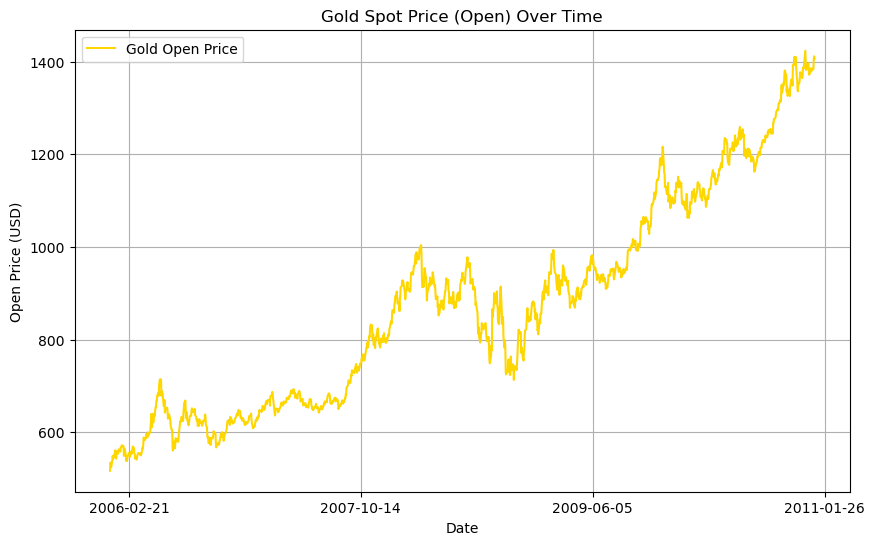

In [58]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.plot(gold_data['Date'], gold_data['Open'], label='Gold Open Price', color='gold')
plt.title('Gold Spot Price (Open) Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')

# Format the x-axis to show only 10 date labels
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10)) 

plt.grid(True)
plt.legend()
plt.show()

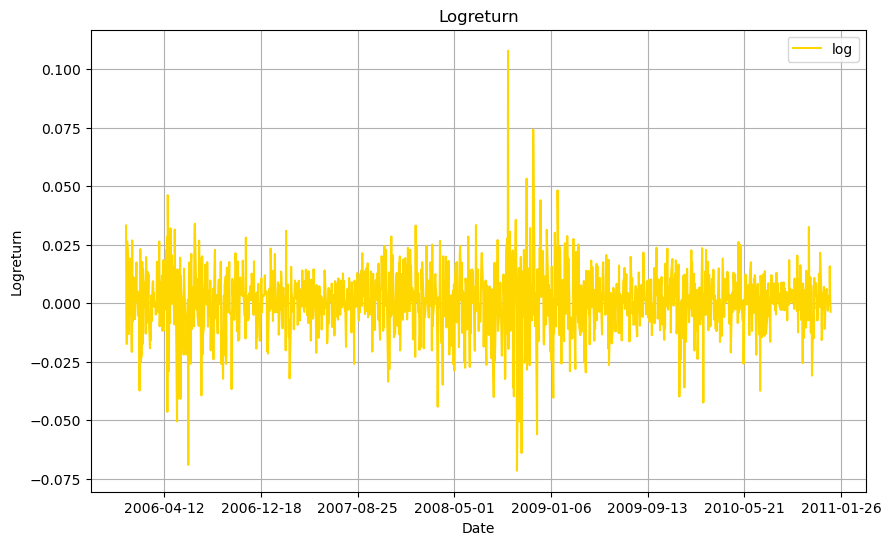

In [61]:


# Define log returns of Apple and Dow Jones
Gold_logreturn = np.log(gold_data['Open']) - np.log(gold_data['Open']).shift(1)
Gold_logreturn = Gold_logreturn.dropna()


plt.figure(figsize=(10, 6))
plt.plot(gold_data['Date'][:-1], Gold_logreturn, label='log', color='gold')
plt.title('Logreturn')
plt.xlabel('Date')
plt.ylabel('Logreturn')

# Format the x-axis to show only 10 date labels
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10)) 

plt.grid(True)
plt.legend()
plt.show()

In [64]:
##DATA Silver

In [67]:
# Load the CSV file explicitly specifying the delimiter
file_path_silver = r"C:\Users\nickr\Downloads\SilverSpot06-11.csv"
silver_data = pd.read_csv(file_path_silver, delimiter=';')



# Ensure the 'Date' column is correctly recognized as a datetime type
silver_data['Date'] = pd.to_datetime(silver_data['Date'], errors='coerce')

# Reverse the DataFrame to get the dates in the desired order
silver_data = silver_data[::-1]




# Clean and convert all relevant numeric columns ('Price', 'Open', 'High', 'Low') to float
columns_to_convert = ['Price', 'Open', 'High', 'Low']

#for col in columns_to_convert:
    #silver_data[col] = silver_data[col].str.replace(' ', '').str.replace(',', '').astype(float)


# Display the first few rows to check if the columns are now correctly separated
silver_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
1303,2006-01-02,88.4,88.1,88.4,88.2,NaN,0.23%
1302,2006-01-03,91.8,88.2,91.8,91.6,NaN,3.85%
1301,2006-01-04,91.3,91.6,91.3,91.2,NaN,-0.54%
1300,2006-01-05,87.3,91.1,87.3,87.2,NaN,-4.38%
1299,2006-01-06,91.1,87.3,91.1,90.9,NaN,4.35%


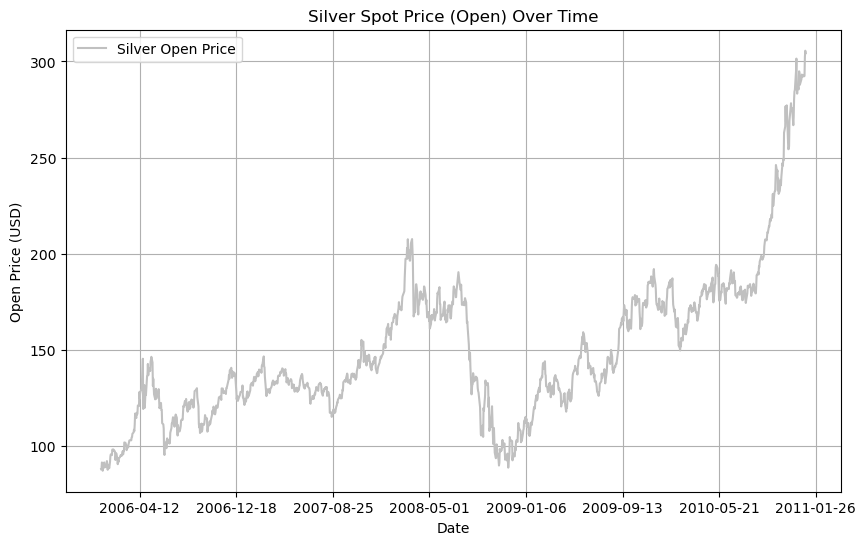

In [68]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.plot(silver_data['Date'], silver_data['Open'], label='Silver Open Price', color='silver')
plt.title('Silver Spot Price (Open) Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')

# Format the x-axis to show only 10 date labels
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10)) 

plt.grid(True)
plt.legend()
plt.show()

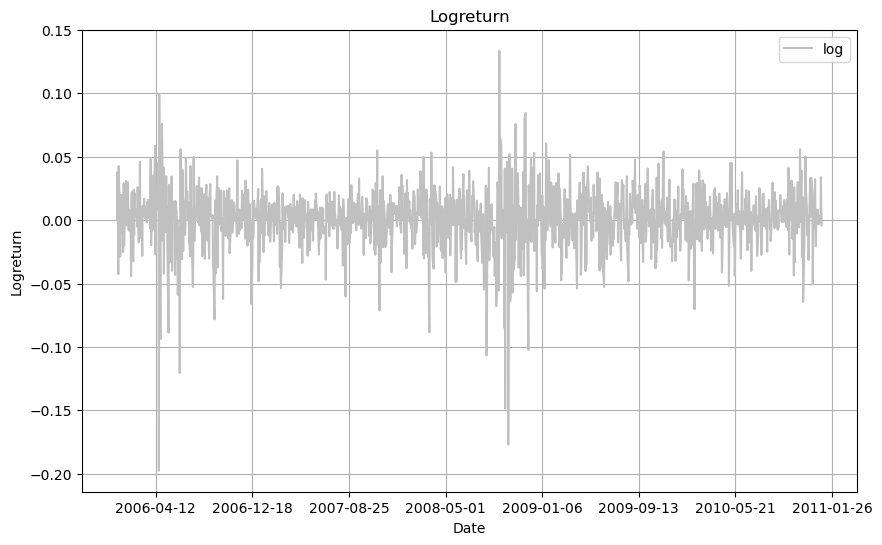

In [69]:
# Define log returns of Apple and Dow Jones
silver_logreturn = np.log(silver_data['Open']) - np.log(silver_data['Open']).shift(1)
silver_logreturn = silver_logreturn.dropna()


plt.figure(figsize=(10, 6))
plt.plot(silver_data['Date'][:-1], silver_logreturn, label='log', color='silver')
plt.title('Logreturn')
plt.xlabel('Date')
plt.ylabel('Logreturn')

# Format the x-axis to show only 10 date labels
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10)) 

plt.grid(True)
plt.legend()
plt.show()